# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Advanced Machine Learning Methods (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Dr. José Antonio Cantoral Ceballos
#### 👩‍🏫 **Assistant Professor:** Dra. Yetnalezi Quintas Ruiz

### 📊 **Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset**

#### 📅 **January 27th, 2025**

### 👥 Team 3

#### **Students:**
* 🧑‍💻 Luis Gerardo Sanchez Salazar (A01232963)
* 🧑‍💻 Javier Augusto Rebull Saucedo (A01795838)
* 🧑‍💻 José Manuel Toral Cruz (A01122243)
* 🧑‍💻 Juan Carlos Pérez Nava (A01795941)
* 🧑‍💻 Oscar Enrique García García (A01016093)

---

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.

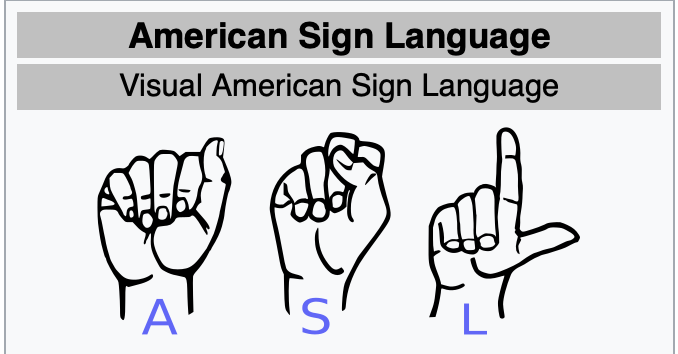

# 🤟 **American Sign Language (ASL): A Visual Language Journey**

American Sign Language (ASL) is a visual-gestural language predominantly used by the Deaf community in the United States and parts of Canada. Unlike spoken English, ASL possesses its own unique grammar and syntax, establishing it as a distinct and complete language.

## 📜 **History of ASL**

The origins of ASL trace back to the early 19th century with the establishment of the American School for the Deaf (ASD) in Hartford, Connecticut, in 1817. Founded by Thomas Hopkins Gallaudet and Laurent Clerc, a Deaf educator from France, the school became a melting pot for various sign languages. Clerc introduced elements of French Sign Language (LSF), which, combined with local sign systems such as Martha's Vineyard Sign Language (MVSL), led to the development of ASL.

Over time, ASL evolved, incorporating influences from various sign languages and adapting to the communicative needs of its users. Although it shares some similarities with LSF, ASL has developed its own distinct characteristics.

## 🎓 **Recognition and Use**

In the 1960s, linguist William Stokoe conducted pioneering research that recognized ASL as a legitimate language with its own syntax and grammar. His work was instrumental in changing perceptions and promoting the acceptance of ASL in educational and social contexts.

Today, ASL is used by a significant number of individuals in the United States. Beyond being the primary means of communication for many Deaf individuals, ASL is also learned by family members, interpreters, and professionals working with the Deaf community. The language continues to evolve, reflecting the dynamic nature of the Deaf community and its culture.

In [1]:
# Data manipulation and numerical operations
import numpy as np                 # For numerical operations and array manipulations
import pandas as pd               # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt    # For creating static visualizations
import seaborn as sns             # For statistical data visualization
sns.set_style("whitegrid")        # Set seaborn style

# System and file operations
import os                         # For operating system operations like file paths
import string                     # For string operations and manipulations

# Google Drive download utility
import gdown                      # For downloading files from Google Drive

In [2]:
%matplotlib inline

# Optional: Set random seed for reproducibility
np.random.seed(42)

# Optional: Configure pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows

# Optional: Set figure size for better visualization
plt.rcParams['figure.figsize'] = [12, 8]    # Default figure size
plt.rcParams['figure.dpi'] = 100            # Figure resolution

# Optional: Set seaborn plotting context
sns.set_context("notebook", font_scale=1.2)  # Set context for better readability

In [3]:
# Create directory for ASL (American Sign Language) dataset
# Using -p flag to avoid errors if directory already exists
!mkdir -p asl_data

# Define URLs for the training and validation datasets
# These URLs point to Google Drive files containing sign language MNIST data
train_url = (
   'https://drive.google.com/uc?id=112F_j2U-7wysYmpRa6FT4tMw5s6xShFr'
)
valid_url = (
   'https://drive.google.com/uc?id=1hKEKFsw4hRl4UXU0Na-LLLE0sRwb5AIr'
)

# Download datasets using gdown library
# quiet=False shows download progress
print("Downloading training dataset...")
gdown.download(
   train_url,
   'asl_data/sign_mnist_train.csv',
   quiet=False
)

print("Downloading validation dataset...")
gdown.download(
   valid_url,
   'asl_data/sign_mnist_valid.csv',
   quiet=False
)

# Load the downloaded CSV files into pandas DataFrames
print("Loading datasets into memory...")
train_df = pd.read_csv('asl_data/sign_mnist_train.csv')
valid_df = pd.read_csv('asl_data/sign_mnist_valid.csv')

# Print dataset dimensions to verify successful loading
print("\nDataset Information:")
print("-" * 20)
print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {valid_df.shape}")

Downloading...
From: https://drive.google.com/uc?id=112F_j2U-7wysYmpRa6FT4tMw5s6xShFr
To: /content/asl_data/sign_mnist_train.csv
100%|██████████| 83.3M/83.3M [00:00<00:00, 132MB/s]


Downloading...
From: https://drive.google.com/uc?id=1hKEKFsw4hRl4UXU0Na-LLLE0sRwb5AIr
To: /content/asl_data/sign_mnist_valid.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 98.4MB/s]


Loading datasets into memory...

Dataset Information:
--------------------
Training data shape: (27455, 785)
Validation data shape: (7172, 785)


In [4]:
# Configuration for a more attractive display
pd.set_option('display.precision', 3)         # Round to 3 decimal places
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 1000)          # Wide screen display
pd.set_option('display.colheader_justify', 'center')  # Center headers

# Apply decorative header
print("\n", "="*80)
print(" "*30 + "DATASET PREVIEW")
print("="*80, "\n")

# Display DataFrame with enhanced styling
train_df.head().style\
    .set_properties(**{'background-color': '#f0f0f0',
                      'color': 'black',
                      'border-color': 'white',
                      'border-style': 'solid',
                      'border-width': '1px',
                      'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#4CAF50'),
                  ('color', 'white'),
                  ('font-size', '12pt'),
                  ('text-align', 'center')]},
        {'selector': 'td',
         'props': [('padding', '8px'),
                  ('font-size', '11pt')]}
    ])\
    .highlight_max(color='lightgreen')\
    .highlight_min(color='#FFB6C6')\
    .set_caption('First 5 rows of Dataset')


                              DATASET PREVIEW



# **🖼️ Images Import**

In [5]:
# Convert the target variable 'label' from training DataFrame to numpy array
y_train = np.array(train_df['label'])

# Convert the target variable 'label' from validation DataFrame to numpy array
y_val = np.array(valid_df['label'])

# Remove the target column 'label' from training DataFrame since it won't be used as a feature
del train_df['label']

# Remove the target column 'label' from validation DataFrame since it won't be used as a feature
del valid_df['label']

# Convert all remaining training data to numpy array with float32 data type
# float32 is commonly used in deep learning for memory efficiency
x_train = train_df.values.astype(np.float32)

# Convert all remaining validation data to numpy array with float32 data type
x_val = valid_df.values.astype(np.float32)

# Print shapes with enhanced formatting (notebook-friendly version)
print("\n" + "="*50)
print("🔍 DATA SHAPES AFTER PROCESSING 🔍".center(50))
print("="*50)

print(f"\n📊 Training Data:")
print(f"   ├─ Features (x_train): {x_train.shape}")
print(f"   └─ Labels (y_train):   {y_train.shape}")

print(f"\n🎯 Validation Data:")
print(f"   ├─ Features (x_val):   {x_val.shape}")
print(f"   └─ Labels (y_val):     {y_val.shape}")
print("\n" + "="*50 + "\n")


         🔍 DATA SHAPES AFTER PROCESSING 🔍         

📊 Training Data:
   ├─ Features (x_train): (27455, 784)
   └─ Labels (y_train):   (27455,)

🎯 Validation Data:
   ├─ Features (x_val):   (7172, 784)
   └─ Labels (y_val):     (7172,)




In [6]:
def split_val_test(x, y, pct=0.5, shuffle=True):
   '''
   Create a function that splits validation data into validation and test sets.

   Parameters:
       x (numpy.ndarray): Features array to be split
       y (numpy.ndarray): Labels array to be split
       pct (float): Percentage of data for validation set (default 0.5)
       shuffle (bool): Whether to randomly shuffle data before splitting (default True)

   Returns:
       tuple: Contains (x_val, y_val, x_test, y_test)
           - x_val (numpy.ndarray): Validation features
           - y_val (numpy.ndarray): Validation labels
           - x_test (numpy.ndarray): Test features
           - y_test (numpy.ndarray): Test labels
   '''
   # Calculate total number of samples in dataset
   n_samples = len(x)

   # Calculate number of samples for validation set based on percentage
   n_val = int(n_samples * pct)

   if shuffle:
       # Create a random permutation of indices for shuffling
       indexes = np.random.permutation(n_samples)

       # Shuffle both features and labels using same index permutation
       # This maintains the correspondence between features and their labels
       x = x[indexes]
       y = y[indexes]

   # Split the data into validation and test sets
   x_val = x[:n_val]    # First n_val samples for validation
   y_val = y[:n_val]    # Corresponding validation labels
   x_test = x[n_val:]   # Remaining samples for test
   y_test = y[n_val:]   # Corresponding test labels

   # Print summary of the split (notebook-friendly version)
   print("\n" + "="*60)
   print("🔄 DATA SPLITTING SUMMARY 🔄".center(60))
   print("="*60)

   print(f"\n📊 Original Data:")
   print(f"   └─ Total samples: {n_samples}")

   print(f"\n🎯 After Split:")
   print(f"   ├─ Validation set: {len(x_val)} samples ({pct*100:.1f}%)")
   print(f"   └─ Test set: {len(x_test)} samples ({(1-pct)*100:.1f}%)")

   print(f"\n📐 Shapes:")
   print(f"   ├─ x_val: {x_val.shape}")
   print(f"   ├─ y_val: {y_val.shape}")
   print(f"   ├─ x_test: {x_test.shape}")
   print(f"   └─ y_test: {y_test.shape}")
   print("\n" + "="*60 + "\n")

   return x_val, y_val, x_test, y_test

In [7]:
# Split x_val and y_val into validation and test sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)


                 🔄 DATA SPLITTING SUMMARY 🔄                 

📊 Original Data:
   └─ Total samples: 7172

🎯 After Split:
   ├─ Validation set: 3586 samples (50.0%)
   └─ Test set: 3586 samples (50.0%)

📐 Shapes:
   ├─ x_val: (3586, 784)
   ├─ y_val: (3586,)
   ├─ x_test: (3586, 784)
   └─ y_test: (3586,)




In [8]:
# Create a list of lowercase letters from a-z
alphabet = list(string.ascii_lowercase)

# Remove letters that require movement in American Sign Language (ASL)
alphabet.remove('j')
alphabet.remove('z')

# Create a decorative border
border = "✨" * 30

# Print formatted output with emojis and styling
print(border)
print("🤟 ASL-Modified Alphabet 🤟")
print(border)
print()
print("📝 Modified alphabet:", ' '.join(alphabet).upper())
print(f"📊 Total letters: {len(alphabet)}")
print()
print("ℹ️  Removed letters:")
print("   • 'j' 👉 Requires tracing 'J' shape in ASL")
print("   • 'z' 👉 Requires tracing 'Z' shape in ASL")
print()
print("🔍 Fun fact: Most ASL letters use static hand positions,")
print("   but 'j' and 'z' are special because they need movement!")
print(border)

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
🤟 ASL-Modified Alphabet 🤟
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

📝 Modified alphabet: A B C D E F G H I K L M N O P Q R S T U V W X Y
📊 Total letters: 24

ℹ️  Removed letters:
   • 'j' 👉 Requires tracing 'J' shape in ASL
   • 'z' 👉 Requires tracing 'Z' shape in ASL

🔍 Fun fact: Most ASL letters use static hand positions,
   but 'j' and 'z' are special because they need movement!
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨


# 🔠 **Normalise**

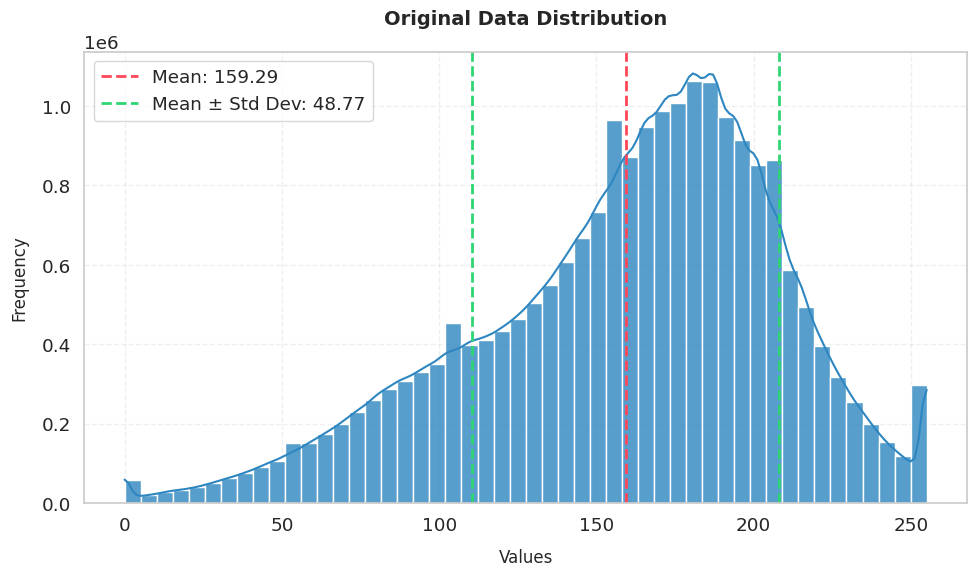


                📊 Original Data Statistics 📊                

📈 Current Statistics:
──────────────────────────────
• Mean:               159.2908
• Standard Deviation: 48.7695
• Minimum Value:      0.0000
• Maximum Value:      255.0000
• Range:             255.0000



In [9]:
def plot_distribution_with_stats(data, title):
    """Helper function to create distribution plot with statistics"""
    # Calculate statistics
    mean = data.mean()
    std_dev = data.std()
    min_val = data.min()
    max_val = data.max()

    # Create histogram with deeper blue color
    sns.histplot(data=data.flatten(),
                bins=50,
                kde=True,
                color='#2E86C1',  # Deeper blue color
                edgecolor='white',
                alpha=0.8)        # Slightly less transparent

    # Add statistical markers with bolder colors
    plt.axvline(mean, color='#FF4757', linestyle='--', linewidth=2,
                label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std_dev, color='#2ED573', linestyle='--', linewidth=2,
                label=f'Mean ± Std Dev: {std_dev:.2f}')
    plt.axvline(mean - std_dev, color='#2ED573', linestyle='--', linewidth=2)

    plt.title(title, fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Values', fontsize=12, labelpad=10)
    plt.ylabel('Frequency', fontsize=12, labelpad=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend()

    return mean, std_dev, min_val, max_val

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot original data
mean_orig, std_orig, min_orig, max_orig = plot_distribution_with_stats(
    x_train,
    'Original Data Distribution'
)

plt.tight_layout()
plt.show()

# Print statistical summaries
print("\n" + "="*60)
print("📊 Original Data Statistics 📊".center(60))
print("="*60 + "\n")

print("📈 Current Statistics:")
print("─"*30)
print(f"• Mean:               {mean_orig:.4f}")
print(f"• Standard Deviation: {std_orig:.4f}")
print(f"• Minimum Value:      {min_orig:.4f}")
print(f"• Maximum Value:      {max_orig:.4f}")
print(f"• Range:             {max_orig - min_orig:.4f}")

print("\n" + "="*60)

In [10]:
def normalise(x_mean, x_std, x_data):
    """
    Normalize data using z-score normalization (standardization).

    Parameters:
    -----------
    x_mean : float
        The mean value of the original dataset
    x_std : float
        The standard deviation of the original dataset
    x_data : array-like
        The data to be normalized

    Returns:
    --------
    array-like
        Normalized data with mean ≈ 0 and standard deviation ≈ 1

    Formula:
    --------
    z = (x - μ) / σ
    where:
        z = normalized value
        x = original value
        μ = mean of the distribution
        σ = standard deviation of the distribution
    """

    # Subtract the mean (centering the data around 0)
    # Then divide by standard deviation (scaling the data)
    # This transforms the data to have mean=0 and std=1
    return (x_data - x_mean) / x_std

In [11]:
# Calculate mean and standard deviation from training data
x_mean = x_train.mean()  # Compute the mean of training data
x_std = x_train.std()    # Compute the standard deviation of training data

# Normalize all datasets using training statistics
# Important: We use training mean/std for all sets to prevent data leakage
x_train = normalise(x_mean, x_std, x_train)  # Normalize training data
x_val = normalise(x_mean, x_std, x_val)      # Normalize validation data using training stats
x_test = normalise(x_mean, x_std, x_test)    # Normalize test data using training stats

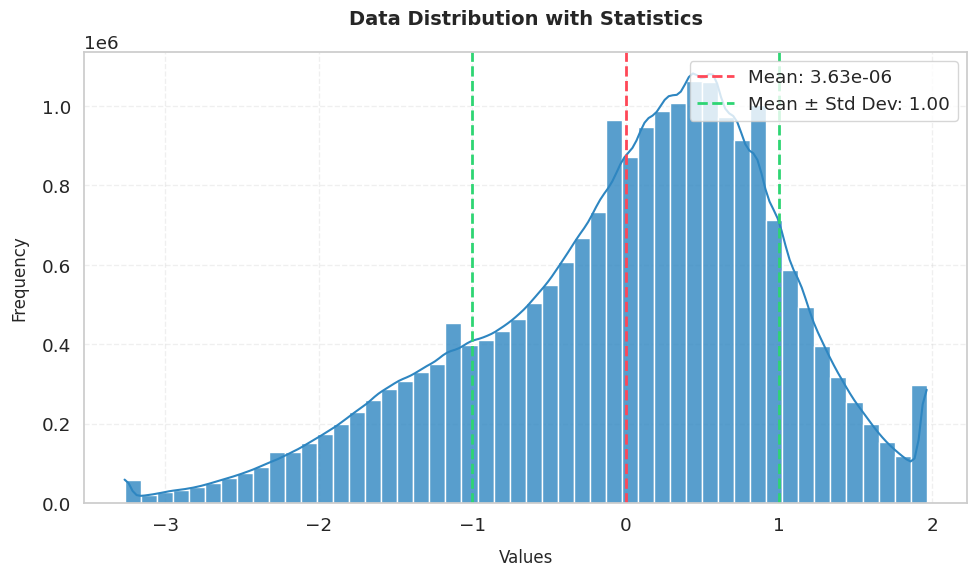


                  📊 Statistical Summary 📊                   

📈 Data Statistics:
──────────────────────────────
• Mean:               3.6268e-06
• Standard Deviation: 1.0000
• Minimum Value:      -3.2662
• Maximum Value:      1.9625
• Range:             5.2287



In [12]:
# Set the visual style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate key statistical measures
mean = x_train.mean()
std_dev = x_train.std()
min_val = x_train.min()
max_val = x_train.max()

# Create histogram with density estimation
sns.histplot(data=x_train.flatten(),
           bins=50,            # Number of histogram bins
           kde=True,           # Add kernel density estimation curve
           color='#2E86C1',    # Deep blue color
           edgecolor='white',  # Edge color of bars
           alpha=0.8)          # Transparency level

# Add statistical reference lines
plt.axvline(mean, color='#FF4757', linestyle='--', linewidth=2,
           label=f'Mean: {mean:.2e}')  # Red vertical line for mean
plt.axvline(mean + std_dev, color='#2ED573', linestyle='--', linewidth=2,
           label=f'Mean ± Std Dev: {std_dev:.2f}')  # Green lines for standard deviation bounds
plt.axvline(mean - std_dev, color='#2ED573', linestyle='--', linewidth=2)

# Set title and labels with improved formatting
plt.title('Data Distribution with Statistics',
         fontsize=14,
         pad=20,
         fontweight='bold')
plt.xlabel('Values', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Enhance legend positioning and style
plt.legend(loc='upper right',
         frameon=True,
         fancybox=True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Print comprehensive statistical summary
print("\n" + "="*60)
print("📊 Statistical Summary 📊".center(60))
print("="*60 + "\n")

print("📈 Data Statistics:")
print("─"*30)
print(f"• Mean:               {mean:.4e}")
print(f"• Standard Deviation: {std_dev:.4f}")
print(f"• Minimum Value:      {min_val:.4f}")
print(f"• Maximum Value:      {max_val:.4f}")
print(f"• Range:             {max_val - min_val:.4f}")

print("\n" + "="*60)

# 📉 **Sample Plotting**

In [20]:
def plot_asl_samples(x_data, y_data, n_samples=3, random_seed=None):
    """
    Visualize random ASL (American Sign Language) letter samples.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    n_samples : int, optional (default=3)
        Number of random samples to display
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """

    # Set random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Create alphabet list (excluding 'j' and 'z' which require movement)
    alphabet = list(string.ascii_lowercase)
    alphabet.remove('j')  # 'j' requires a motion
    alphabet.remove('z')  # 'z' requires a motion

    # Set up the figure with adequate size
    plt.figure(figsize=(5*n_samples, 5))

    # Plot each random sample
    for i in range(n_samples):
        # Generate random index
        idx = np.random.randint(len(y_data))

        # Create subplot
        plt.subplot(1, n_samples, i+1)

        # Reshape and display image
        img = x_data[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')

        # Add title with letter information
        plt.title(f'Letter: {alphabet[y_data[idx]].upper()}',
                 fontsize=14,
                 pad=10,
                 fontweight='bold')

        # Remove axes for cleaner visualization
        plt.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


          🤟 ASL Letters Visualization 🤟           


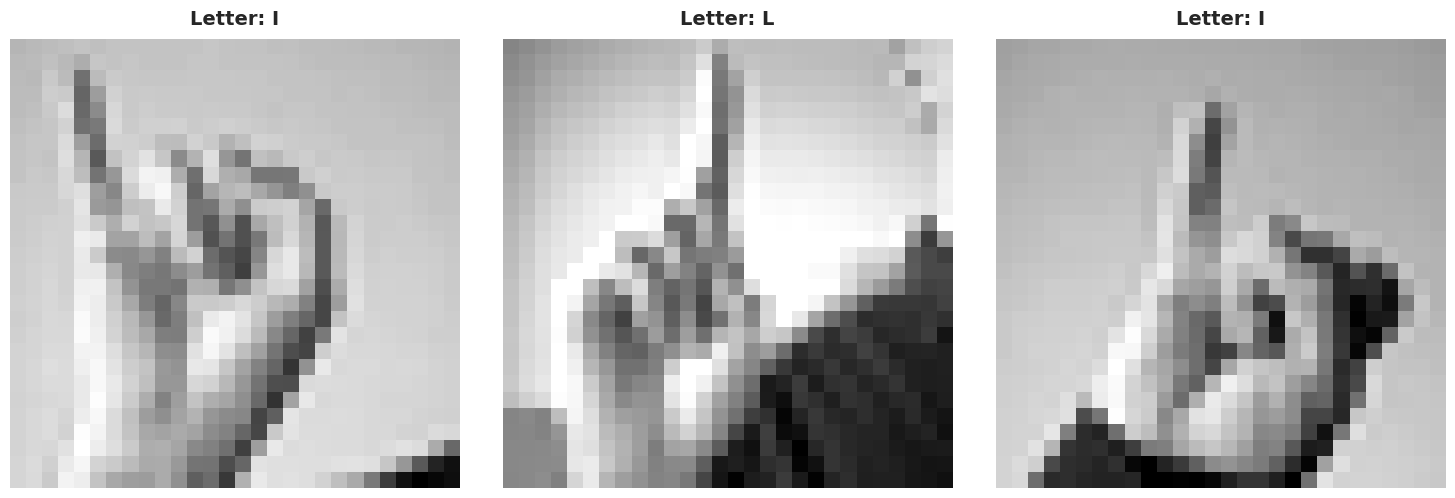

In [21]:
# Example usage with test data
def plot_single_asl(x_data, y_data, random_seed=None):
    """
    Visualize a single random ASL letter sample.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """
    plot_asl_samples(x_data, y_data, n_samples=1, random_seed=random_seed)

# Print information about displayed samples
print("\n" + "="*50)
print("🤟 ASL Letters Visualization 🤟".center(50))
print("="*50)

# Example calls:
# For multiple samples
plot_asl_samples(x_test, y_test, n_samples=3)

# For a single sample
# plot_single_asl(x_test, y_test)

# 📐 Equations for our Model

## Neural Network Forward Pass and Loss Calculation Equations

--------------------------------------------------------------------
1️⃣ First Layer (Input → Hidden Layer)
--------------------------------------------------------------------
$$z^1 = W^1 X + b^1$$

- W¹: Weight matrix for first layer
- X:  Input data
- b¹: Bias vector
- z¹: Pre-activation values

--------------------------------------------------------------------
2️⃣ Activation Function
--------------------------------------------------------------------
$$a^1 = ReLU(z^1)$$

- ReLU(x) = max(0,x)
- Keeps positive values
- Sets negative values to 0
- a¹: Activated values of hidden layer

--------------------------------------------------------------------
3️⃣ Second Layer (Hidden → Output Layer)
--------------------------------------------------------------------
$$z^2 = W^2 a^1 + b^2$$

- W²: Weight matrix for second layer
- a¹: Activated values from previous layer
- b²: Bias vector
- z²: Pre-activation output values

--------------------------------------------------------------------
4️⃣ Softmax Function (Probability Distribution)
--------------------------------------------------------------------
$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$

- e^z: Exponential of each output
- Denominator normalizes values
- ŷ: Predicted probabilities (sum to 1)

--------------------------------------------------------------------
5️⃣ Cross-Entropy Loss (Single Sample)
--------------------------------------------------------------------
$$ \mathcal{L}(\hat{y}^{i}, y^{i}) = - y^{i} \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$

- y^i: True label (one-hot encoded)
- ŷ^i: Predicted probability
- ln: Natural logarithm

--------------------------------------------------------------------
6️⃣ Cost Function (Average Loss)
--------------------------------------------------------------------
$$ \mathcal{J}(w, b) = \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

- Averages loss across all samples
- num_samples: Total training examples
- Goal: Minimize this during training

--------------------------------------------------------------------

# Additional Funtions

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):

    '''
    mb_size: tamaño del mini-batch
    x: datos de entrada (features)
    y: etiquetas
    shuffle: si se deben mezclar los datos
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]

    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

In [ ]:
class np_tensor(np.ndarray): pass

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)


### Clase ReLU

In [ ]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista de capas (Linear, ReLU)
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}

    def __call__(self, X):
        '''Forward pass a través de todas las capas'''
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)] = self.x
        return self.x

    def backward(self):
        '''Backward pass a través de todas las capas'''
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)],
                                  self.outputs['l'+str(i+1)])

    def update(self, learning_rate=1e-3):
        '''Actualiza los parámetros del modelo'''
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        '''Retorna la predicción para una entrada X'''
        return np.argmax(self.__call__(X))

### Cost Function

In [ ]:
def softmaxXEntropy(x, y):
    '''
    Calcula softmax y cross-entropy loss
    x: scores (output de la última capa)
    y: labels verdaderas
    '''
    batch_size = x.shape[1]

    # Softmax
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis=0)
    preds = probs.copy()

    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [ ]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [ ]:
def train(model, epochs, mb_size0.15=128, learning_rate = 1e-3):
    '''
    Entrena el modelo

    Parámetros
    model:         modelo Sequential_layers
    epochs:        número de épocas
    mb_size:       tamaño del mini-batch
    learning_rate: tasa de aprendizaje
    '''

    history = {'loss': [], 'val_acc': []}

    for epoch in range(epochs):
        losses = []

        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # Forward pass
            scores = model(x.T.view(np_tensor))

            # Calcular pérdida
            _, cost = softmaxXEntropy(scores, y)
            losses.append(cost)

            # Backward pass y actualización
            model.backward()
            model.update(learning_rate)

        avg_loss = np.mean(losses)
        val_acc = accuracy(x_val, y_val, mb_size)

        history['loss'].append(avg_loss)
        history['val_acc'].append(val_acc)

        print(f'epoch: {(epoch + 1):03d}, costo: {cost:.3e}, accuracy: {accuracy(x_val, y_val, mb_size)*100:.4f}%')

    return history

### Create your model and train it

In [ ]:
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200,24)])
mb_size = 512
learning_rate = 1e-4
epochs = 200


In [ ]:
history = train(model, epochs, mb_size, learning_rate)

epoch: 001, costo: 1.118e+00, accuracy: 58.3659%
epoch: 002, costo: 6.445e-01, accuracy: 68.2097%
epoch: 003, costo: 4.110e-01, accuracy: 72.8388%
epoch: 004, costo: 2.433e-01, accuracy: 74.0937%
epoch: 005, costo: 1.687e-01, accuracy: 76.1573%
epoch: 006, costo: 1.086e-01, accuracy: 76.4083%
epoch: 007, costo: 8.225e-02, accuracy: 76.7708%
epoch: 008, costo: 6.982e-02, accuracy: 76.8265%
epoch: 009, costo: 5.391e-02, accuracy: 77.1612%
epoch: 010, costo: 4.782e-02, accuracy: 77.1891%
epoch: 011, costo: 3.700e-02, accuracy: 77.3564%
epoch: 012, costo: 3.263e-02, accuracy: 77.4400%
epoch: 013, costo: 3.032e-02, accuracy: 77.3564%
epoch: 014, costo: 2.799e-02, accuracy: 77.4679%
epoch: 015, costo: 2.398e-02, accuracy: 77.5516%
epoch: 016, costo: 2.236e-02, accuracy: 77.4400%
epoch: 017, costo: 1.844e-02, accuracy: 77.3564%
epoch: 018, costo: 1.815e-02, accuracy: 77.3285%
epoch: 019, costo: 1.688e-02, accuracy: 77.5237%
epoch: 020, costo: 1.523e-02, accuracy: 77.4400%
epoch: 021, costo: 1

In [ ]:
print(accuracy(x_test, y_test, mb_size))

0.7741215839375348


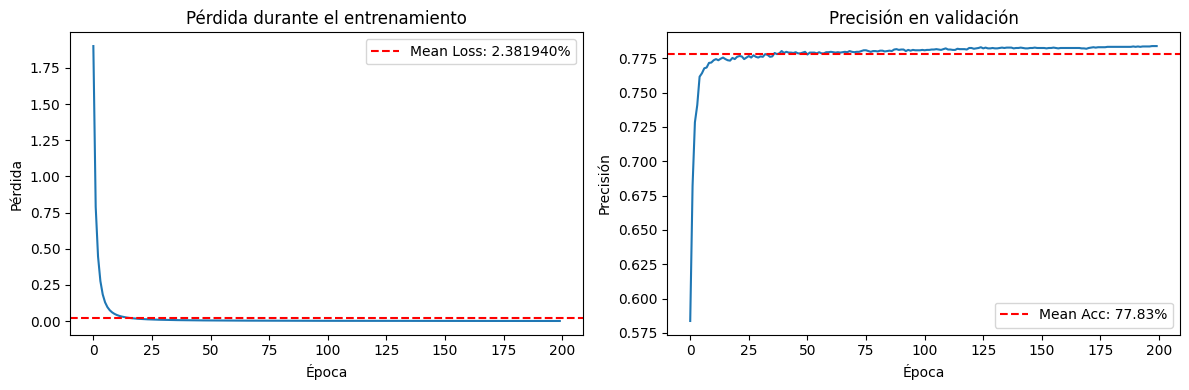

In [ ]:
plt.figure(figsize=(12, 4))

mean_loss = np.mean(history['loss'])
mean_acc = np.mean(history['val_acc'])


plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.axhline(y=mean_loss, color='r', linestyle='--', label=f'Mean Loss: {mean_loss * 100:2f}%')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Pérdida')

plt.subplot(1, 2, 2)
plt.plot(history['val_acc'])
plt.axhline(y=mean_acc, color='r', linestyle='--', label=f'Mean Acc: {mean_acc * 100:.2f}%')
plt.title('Precisión en validación')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Precisión')

plt.tight_layout()
plt.show()

### Test your model on Random data from your test set

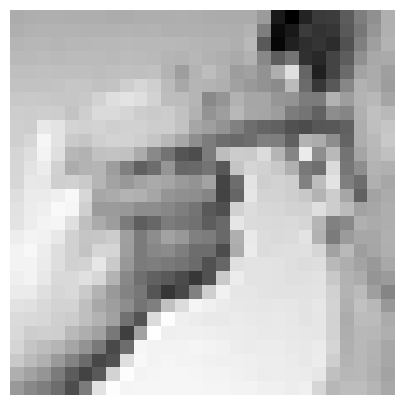

el valor predicho es: H el valor real es: H
¿Predicción correcta? ✓


In [ ]:
idx = np.random.randint(len(y_test))
plot(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred].upper()} el valor real es: {alphabet[y_test[idx]].upper()}')
print(f'¿Predicción correcta? {"✓" if pred == y_test[idx] else "✗"}')

# 📚 **References**

---

## 🎥 **Videos**  
1. Pepe Cantoral, Ph.D. (2021, January 29). *¿Qué hacen las capas de una red neuronal? - Inteligencia Artificial / What do the layers of a neural network do? - Artificial Intelligence* [Video file]. YouTube. https://www.youtube.com/watch?v=jGNYsjHTnho  

2. Pepe Cantoral, Ph.D. (2021, February 2). *Modelo matemático de una neurona artificial - Redes neuronales - (Parte 2) / Mathematical model of an artificial neuron - Neural networks - (Part 2)* [Video file]. YouTube. https://www.youtube.com/watch?v=XoIj-omJAZo  

3. Pepe Cantoral, Ph.D. (2021, February 5). *Función SOFTMAX - Redes neuronales - (Parte 3) / SOFTMAX function - Neural networks - (Part 3)* [Video file]. YouTube. https://www.youtube.com/watch?v=3KhumV1S6vs  

4. Pepe Cantoral, Ph.D. (2021, February 9). *Función de costo - Cross Entropy - Redes neuronales - (Parte 4) / Cost function - Cross entropy - Neural networks - (Part 4)* [Video file]. YouTube. https://www.youtube.com/watch?v=ie-tCP7YYrI  

5. Pepe Cantoral, Ph.D. (2021, February 19). *Gradient descent – Redes neuronales - (Parte 5) / Gradient descent - Neural networks - (Part 5)* [Video file]. YouTube. https://www.youtube.com/watch?v=lnDjwepC-5I  

6. Pepe Cantoral, Ph.D. (2021, February 22). *¿Por qué usamos el gradiente para entrenar redes neuronales? Ejemplo - Deep learning - (Parte 6) / Why do we use gradients to train neural networks? Example - Deep learning - (Part 6)* [Video file]. YouTube. https://www.youtube.com/watch?v=Cr5cYDrMYZQ  

7. Pepe Cantoral, Ph.D. (2021, March 10). *"Backpropagation" – Fundamentos de Deep Learning – (Parte 7) / "Backpropagation" – Foundations of Deep Learning – (Part 7)* [Video file]. YouTube. https://www.youtube.com/watch?v=4nDsiV3GXa8  

8. Pepe Cantoral, Ph.D. (2021, May 15). *¡Red neuronal desde cero estilo framework de Deep Learning! / Neural network from scratch in Deep Learning framework style!* [Video file]. YouTube. https://www.youtube.com/watch?v=_shpKyA89QQ  

9. Pepe Cantoral, Ph.D. (2021, May 18). *¡Red neuronal desde cero estilo framework de Deep Learning - Parte 2! / Neural network from scratch in Deep Learning framework style - Part 2!* [Video file]. YouTube. https://www.youtube.com/watch?v=l2v2mVcOx6o  

10. Pepe Cantoral, Ph.D. (2021, July 6). *¡Red neuronal usando PyTorch! PyTorch tutorial / Neural network using PyTorch! PyTorch tutorial* [Video file]. YouTube. https://www.youtube.com/watch?v=qQELiV1_GHA  

---

## 📖 **Books**  
1. Raschka, S., Liu, Y., Mirjalili, V., & Dzhulgakov, D. (2022). *Machine learning with PyTorch and Scikit-learn: Develop machine learning and deep learning models with Python*. Packt Publishing. Chapter 11

---

## 📄 **Papers**  
1. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). *Learning representations by back-propagating errors*. Institute for Cognitive Science. https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf  

2. Glorot, X., Bordes, A., & Bengio, Y. (2011). *Deep sparse rectifier neural networks*. http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf  

---

## 🎓 **Live Session Recordings**  
1. Pepe Cantoral, Ph.D. (2025, January 9). *Active class 1 | Welcome session*.  

---

## 📊 **Presentations**  
1. Pepe Cantoral, Ph.D. (2025, January 9). *A brief history of AI*.

---

## 📚 **Web**
1. Gallaudet University. (n.d.). *American Sign Language, a language recognized*. Retrieved January 20, 2025, from https://gallaudet.edu/museum/exhibits/history-through-deaf-eyes/awareness-access-and-change/american-sign-language-a-language-recognized/

2. History.com Editors. (2023, December 15). *The collaborative origins of American Sign Language*. Retrieved January 20, 2025, from https://www.history.com/news/american-sign-language-origins

3. Wikipedia contributors. (2023, December 15). *American Sign Language*. In *Wikipedia, The Free Encyclopedia*. Retrieved January 20, 2025, from https://en.wikipedia.org/wiki/American_Sign_Language